In [4]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [5]:
(X_train, y_train) ,(X_test, y_test) = keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [6]:
len(X_train)

60000

In [7]:
len(X_test)

10000

In [8]:
X_train[0].shape

(28, 28)

In [9]:
X_train.shape

(60000, 28, 28)

In [10]:
X_train = X_train / 255
X_test = X_test / 255

In [11]:
X_train_flattened = X_train.reshape(len(X_train),28*28)
X_test_flattened = X_test.reshape(len(X_test),28*28)

In [12]:
X_test_flattened.shape

(10000, 784)

In [30]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,),activation='sigmoid')   
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
) 
model.fit(X_train_flattened, y_train, epochs=5) 

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4721 - accuracy: 0.8759
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3041 - accuracy: 0.9159
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2835 - accuracy: 0.9204
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2729 - accuracy: 0.9241
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2668 - accuracy: 0.9256


In [14]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2702 - accuracy: 0.9243


[0.2702208459377289, 0.9243000149726868]

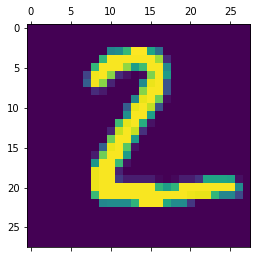

In [15]:
plt.matshow(X_test[1])

In [16]:
y_predicted = model.predict(X_test_flattened) 
y_predicted[1]

array([3.3064801e-01, 9.3688965e-03, 9.9966168e-01, 3.1943274e-01,
       8.4946566e-10, 8.6647612e-01, 9.3560690e-01, 1.4710837e-12,
       1.4374322e-01, 6.1826562e-09], dtype=float32)

In [17]:
np.argmax(y_predicted[1])

2

In [18]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [19]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 955,    0,    2,    1,    0,    8,    9,    3,    1,    1],
       [   0, 1118,    4,    1,    0,    1,    4,    2,    5,    0],
       [   3,    8,  941,    9,    8,    5,   12,    9,   31,    6],
       [   2,    0,   24,  902,    0,   36,    2,   10,   16,   18],
       [   1,    2,    4,    1,  905,    0,   10,    5,    7,   47],
       [   7,    2,    5,   19,    9,  800,   13,    6,   22,    9],
       [   8,    3,    6,    1,    7,   17,  912,    2,    2,    0],
       [   1,    6,   24,    4,    9,    1,    0,  940,    2,   41],
       [   6,   11,   10,   18,    9,   49,    9,   11,  828,   23],
       [   8,    7,    1,    7,   17,   10,    0,   13,    4,  942]],
      dtype=int32)>

Text(69.0, 0.5, 'truth')

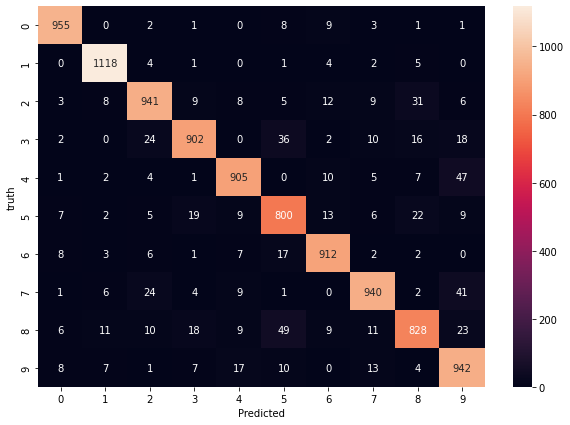

In [29]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm,annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('truth')

In [40]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)
model.fit(X_train_flattened, y_train, epochs=5) 

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2691 - accuracy: 0.9233
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1211 - accuracy: 0.9641
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0853 - accuracy: 0.9744
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0654 - accuracy: 0.9804
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0508 - accuracy: 0.9843


In [41]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0807 - accuracy: 0.9764


[0.08072897791862488, 0.9764000177383423]

Text(69.0, 0.5, 'truth')

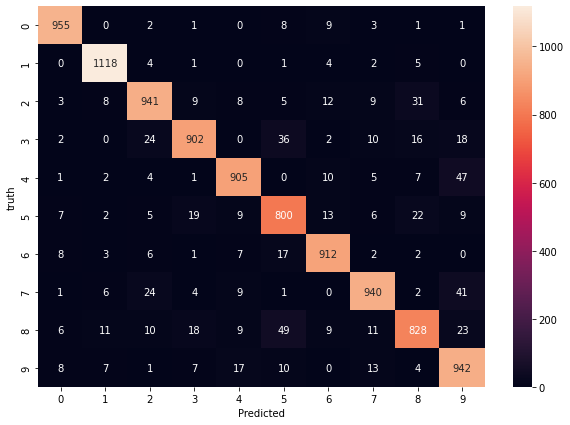

In [43]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm,annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('truth')